<a href="https://colab.research.google.com/github/arelsaputra/CNN/blob/main/fruit360_classification_set_accuracy_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

# Data Preprocessing

## Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training_fruit_vegetable/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


## Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training_fruit_vegetable/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Building Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(36, activation='softmax')
])

## Compiling and Training Phase

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [ ]:
history = model.fit(
    training_set,
    epochs=30,
    validation_data=validation_set,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
98/98 [==============================] - 590s 6s/step - loss: 3.6831 - accuracy: 0.0860 - val_loss: 3.3324 - val_accuracy: 0.1567 - lr: 0.0010
Epoch 2/30
98/98 [==============================] - 119s 1s/step - loss: 3.0002 - accuracy: 0.1743 - val_loss: 2.1042 - val_accuracy: 0.3390 - lr: 0.0010
Epoch 3/30
98/98 [==============================] - 118s 1s/step - loss: 2.6982 - accuracy: 0.2302 - val_loss: 1.7652 - val_accuracy: 0.4729 - lr: 0.0010
Epoch 4/30
98/98 [==============================] - 122s 1s/step - loss: 2.5211 - accuracy: 0.2607 - val_loss: 1.6721 - val_accuracy: 0.4501 - lr: 0.0010
Epoch 5/30
98/98 [==============================] - 118s 1s/step - loss: 2.3523 - accuracy: 0.2915 - val_loss: 2.1396 - val_accuracy: 0.3590 - lr: 0.0010
Epoch 6/30
98/98 [==============================] - 117s 1s/step - loss: 2.2186 - accuracy: 0.3393 - val_loss: 1.7819 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 7/30
98/98 [==============================] - 118s 1s/step - loss: 2.1

# Evaluating Model


In [ ]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 94s 887ms/step - loss: 0.3360 - accuracy: 0.9069
Training accuracy: 0.9069020748138428


In [ ]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 13s 378ms/step - loss: 0.3926 - accuracy: 0.9088
Validation accuracy: 0.9088318943977356


# Saving Model

In [ ]:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history.history

{'loss': [3.683051586151123,
  3.0002241134643555,
  2.6981804370880127,
  2.5211169719696045,
  2.3522658348083496,
  2.2186458110809326,
  2.1280133724212646,
  1.9949836730957031,
  1.8753927946090698,
  1.8034029006958008,
  1.6842647790908813,
  1.695207953453064,
  1.5057380199432373,
  1.4112379550933838,
  1.3845266103744507,
  1.321395993232727,
  1.309661626815796,
  1.3068807125091553,
  1.2267225980758667,
  1.0369524955749512,
  0.918830156326294,
  0.8669062852859497,
  0.7781382203102112,
  0.7967990636825562,
  0.7423283457756042,
  0.9040393233299255,
  0.8436415791511536,
  0.699643611907959,
  0.6978514194488525,
  0.6128456592559814],
 'accuracy': [0.08603531122207642,
  0.17431782186031342,
  0.23017656803131104,
  0.2606741487979889,
  0.2914927899837494,
  0.33932584524154663,
  0.3611556887626648,
  0.40032103657722473,
  0.42953452467918396,
  0.4420545697212219,
  0.4796147644519806,
  0.4837881326675415,
  0.5338683724403381,
  0.5589085221290588,
  0.5704655

In [ ]:
# Convert NumPy float32 values to standard Python floats
for key in history.history:
    history.history[key] = [float(val) for val in history.history[key]]

with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


# Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 90.88318943977356 %


# Accuracy Visualization

## Training Visualization


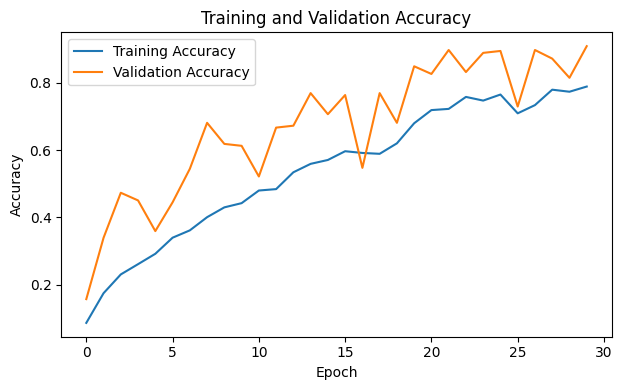

In [ ]:
# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## Validation Accuracy

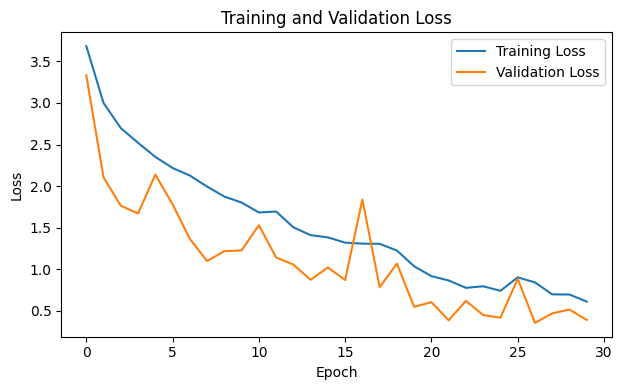

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Test set Evaluation

In [ ]:
if os.path.exists('/content/drive/MyDrive/Training_fruit_vegetable/test'):
    print("Directory exists!")
else:
    print("Directory not found. Check the path and try again.")

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training_fruit_vegetable/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Directory exists!
Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 49s 969ms/step - loss: 0.3880 - accuracy: 0.9109
Test accuracy: 0.9108635187149048


# Display image

In [ ]:
test_data = '/content/drive/MyDrive/Training_fruit_vegetable/test/apple/Image_5.jpg'
true_class = os.path.basename(os.path.dirname(test_data))
test_img = image.load_img(test_data, target_size=(64, 64)) # Use image.load_img
img_arr = image.img_to_array(test_img) # Use image.img_to_array
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.0

In [ ]:
prediksi = model.predict(img_arr)  # Make prediction
hasil_prediksi = np.argmax(prediksi)  # Get predicted class index

1/1 [==============================] - 0s 65ms/step


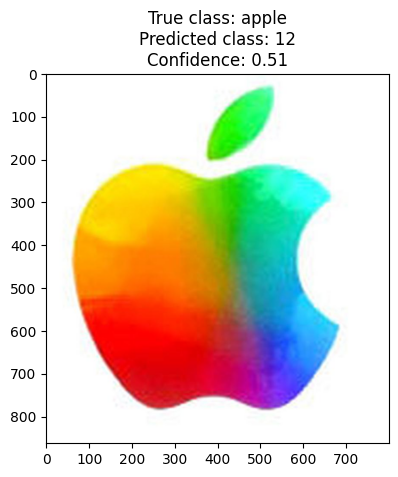

In [ ]:
img = mpimg.imread(test_data)
imgplot = plt.imshow(img)
plt.title(f"True class: {true_class}\nPredicted class: {hasil_prediksi}\nConfidence: {prediksi[0][np.argmax(prediksi)]:.2f}")
plt.show()